In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MEDIQA-CORR-2024-MS-TrainingData.csv to MEDIQA-CORR-2024-MS-TrainingData.csv


In [ ]:
df = pd.read_csv('MEDIQA-CORR-2024-MS-TrainingData.csv', delimiter=',', encoding='utf-8')
df= df.drop(['Error Sentence ID', 'Error Sentence', 'Corrected Sentence', 'Corrected Text'], axis=1)
df.head()

,Unnamed: 0,Text ID,Text,Sentences,Error Flag
0,0,ms-train-0,A 53-year-old man comes to the physician becau...,0 A 53-year-old man comes to the physician bec...,1
1,1,ms-train-1,A 53-year-old man comes to the physician becau...,0 A 53-year-old man comes to the physician bec...,0
2,2,ms-train-2,A 9-year-old girl is brought to the pediatrici...,0 A 9-year-old girl is brought to the pediatri...,1
3,3,ms-train-3,A 9-year-old girl is brought to the pediatrici...,0 A 9-year-old girl is brought to the pediatri...,0
4,4,ms-train-4,Blood cultures are sent to the laboratory. Int...,0 Blood cultures are sent to the laboratory.\n...,1


In [ ]:
# Analizamos las primeras 5 columnas para obtener sus tipos de datos y otras características
column_info = df.dtypes

# Analizamos los nombres de las columnas para identificar las primeras 5
column_names = df.columns[:5]

# Extraemos ejemplos de datos de las primeras 5 columnas para entender mejor su contenido
sample_data = df.head()

column_info[:5], column_names, sample_data

(Unnamed: 0     int64
 Text ID       object
 Text          object
 Sentences     object
 Error Flag     int64
 dtype: object,
 Index(['Unnamed: 0', 'Text ID', 'Text', 'Sentences', 'Error Flag'], dtype='object'),
    Unnamed: 0     Text ID                                               Text  \
 0           0  ms-train-0  A 53-year-old man comes to the physician becau...   
 1           1  ms-train-1  A 53-year-old man comes to the physician becau...   
 2           2  ms-train-2  A 9-year-old girl is brought to the pediatrici...   
 3           3  ms-train-3  A 9-year-old girl is brought to the pediatrici...   
 4           4  ms-train-4  Blood cultures are sent to the laboratory. Int...   
 
                                            Sentences  Error Flag  
 0  0 A 53-year-old man comes to the physician bec...           1  
 1  0 A 53-year-old man comes to the physician bec...           0  
 2  0 A 9-year-old girl is brought to the pediatri...           1  
 3  0 A 9-year-old girl is b

In [ ]:
# Revisar los valores nulos
df.replace('', np.nan, inplace=True)

# Lista de columnas a revisar
columns_to_check = ['Unnamed: 0', 'Text ID', 'Text', 'Sentences', 'Error Flag']

#  Iterar sobre cada columna y contar los valores nulos
for column in columns_to_check:
    # Contar los valores nulos en la columna
    missing_count = df[column].isnull().sum()
    print(f'Número de datos faltantes en {column}: {missing_count}')


Número de datos faltantes en Unnamed: 0: 0
Número de datos faltantes en Text ID: 0
Número de datos faltantes en Text: 0
Número de datos faltantes en Sentences: 0
Número de datos faltantes en Error Flag: 0


In [ ]:
import re

special_char_pattern = re.compile(r'[^a-zA-Z0-9 \.,!?]')

# Re-definir la lista de columnas a revisar para caracteres especiales
columns_to_check = ['Text ID', 'Text', 'Sentences']

# Contar los caracteres especiales en las columnas de texto seleccionadas
special_characters_counts = df[columns_to_check].applymap(lambda x: len(special_char_pattern.findall(x)) if pd.notnull(x) else 0)

# Calcular el total de caracteres especiales por columna
total_special_characters_per_column = special_characters_counts.sum()

total_special_characters_per_column


Text ID       4378
Text         26854
Sentences    78700
dtype: int64

In [ ]:
from collections import Counter

# Extraer todos los caracteres especiales encontrados en la columna 'Text'
all_special_characters_text_id = ''.join(df['Text'].apply(lambda x: ''.join(special_char_pattern.findall(x))))

# Contar la frecuencia de cada caracter especial
special_character_frequencies_text_id = Counter(all_special_characters_text_id)

special_character_frequencies_text_id


Counter({'-': 7651,
         '(': 1858,
         ')': 1858,
         '/': 6072,
         ';': 457,
         '%': 698,
         "'": 602,
         ':': 886,
         'â': 552,
         '€': 523,
         '“': 274,
         '\n': 4037,
         'œ': 92,
         '\x9d': 95,
         '+': 504,
         '‰': 21,
         '¥': 19,
         '"': 103,
         '™': 60,
         '’': 12,
         '=': 65,
         'Î': 110,
         '³': 16,
         'Ã': 6,
         '—': 3,
         '¼': 73,
         '<': 45,
         'Â': 19,
         'µ': 16,
         '²': 15,
         'ˆ': 8,
         '±': 6,
         '^': 45,
         'Ÿ': 2,
         '©': 1,
         '>': 17,
         'º': 2,
         '_': 24,
         '¤': 2,
         '½': 1,
         '[': 2,
         ']': 2})

In [ ]:
# Inspeccionar los caracteres especiales más frecuentes en 'Text' y 'Sentences'
def extract_special_characters(text):
    return special_char_pattern.findall(text)

# Aplicar la extracción a las columnas 'Text' y 'Sentences'
special_characters_text = ''.join(df['Text'].apply(lambda x: ''.join(extract_special_characters(x))))
special_characters_sentences = ''.join(df['Sentences'].apply(lambda x: ''.join(extract_special_characters(x))))

# Contar la frecuencia de cada caracter especial
special_character_frequencies_text = Counter(special_characters_text)
special_character_frequencies_sentences = Counter(special_characters_sentences)

# Identificar los 10 caracteres especiales más comunes en cada columna
top_10_special_characters_text = special_character_frequencies_text.most_common(10)
top_10_special_characters_sentences = special_character_frequencies_sentences.most_common(10)

top_10_special_characters_text, top_10_special_characters_sentences

([('-', 7651),
  ('/', 6072),
  ('\n', 4037),
  ('(', 1858),
  (')', 1858),
  (':', 886),
  ('%', 698),
  ("'", 602),
  ('â', 552),
  ('€', 523)],
 [('\n', 45828),
  ('-', 11040),
  ('/', 8782),
  ('(', 2686),
  (')', 2686),
  (':', 1241),
  ('%', 1007),
  ("'", 863),
  ('â', 783),
  ('€', 741)])

In [ ]:
from collections import defaultdict
import re

text_column = df['Text']

# Definir un patrón de regex para buscar caracteres que no sean alfanuméricos ni espacios básicos
special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')

# Diccionario para almacenar hasta 5 ejemplos por cada carácter especial encontrado
examples_per_special_char = defaultdict(list)

# Recorrer cada texto en la columna 'Text'
for text in text_column:
    # Encontrar todos los caracteres especiales únicos en el texto actual
    unique_special_chars = set(special_char_pattern.findall(text))
    # Para cada carácter especial encontrado, agregar el texto actual como un ejemplo
    for char in unique_special_chars:
        if len(examples_per_special_char[char]) < 10:
            examples_per_special_char[char].append(text)

# Convertir el diccionario a un formato más legible para la presentación
{char: examples[:2] for char, examples in examples_per_special_char.items()}

{'.': ['A 53-year-old man comes to the physician because of a 1-day history of fever and chills, severe malaise, and cough with yellow-green sputum. He works as a commercial fisherman on Lake Superior. Current medications include metoprolol and warfarin. His temperature is 38.5 C (101.3 F), pulse is 96/min, respirations are 26/min, and blood pressure is 98/62 mm Hg. Examination shows increased fremitus and bronchial breath sounds over the right middle lung field. After reviewing imaging, the causal pathogen was determined to be Haemophilus influenzae. An x-ray of the chest showed consolidation of the right upper lobe.',
  'A 53-year-old man comes to the physician because of a 1-day history of fever and chills, severe malaise, and cough with yellow-green sputum. He works as a commercial fisherman on Lake Superior. Current medications include metoprolol and warfarin. His temperature is 38.5 C (101.3 F), pulse is 96/min, respirations are 26/min, and blood pressure is 98/62 mm Hg. Examinat

In [ ]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "â€\x9d": " ",
    ".â€\x9d": ".",
    "â€“": "-",
    "â€œsomething": "something",
    "patientâ€™s": "patients",
    "â‰¥": "≥",
    "\n": ",",
    "â€œ": "",
    "Waldenstromâ€™s": "Waldenströms",
    "Âµmol/L": "µmol/L",
    "â€œmemory": "memory",
    "weeksâ€™": "weeks",
    "74 Î¼m3": "74 μm^3",
    "ÂµIU/L": "µIU/L",
    "â‰¤": "≤",
    "Clâˆ’": "Cl-",
    "physicianâ€™s": "physicians",
    "ÂºF": "ºF",
    "âˆ’": "-",
    "Â½": "½",
    "Î¼g/dL": "μg/dL",
    "pediatricianâ€™s": "pediatricians",
    "yearsâ€™": "years",
    "Âµg": "µg",
    "â€": "",
    "Kennedyâ€™s": "Kennedys",
    "Kennedy™s": "Kennedys",
    "can™t": "can't",
    "Î²": "β",
    "Ã—": "x",
    "ÃŸ-hCG": "β-hCG",
    "SÃ©quard": "Séquard",
    "Î³": "γ",
    "Î¼m3": "μm^3",
    "Î±": "α",
    "Î¼U/mL": "μU/mL",
    "Î¼": "μ",
    "'": " ",
    "\"":"" #Este lo dejo a consideracion, dependiendo si les funciona o no
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    df['Text'] = df['Text'].str.replace(old, new, regex=False)

# Verificar el reemplazo
df['Text'].head()


0    A 53-year-old man comes to the physician becau...
1    A 53-year-old man comes to the physician becau...
2    A 9-year-old girl is brought to the pediatrici...
3    A 9-year-old girl is brought to the pediatrici...
4    Blood cultures are sent to the laboratory. Int...
Name: Text, dtype: object

In [ ]:
import pandas as pd
import re

# Suponiendo que df es tu DataFrame

# Función para aplicar todas las transformaciones no regex en una sola pasada
def optimize_text(text):
    # Aplicar transformaciones no regex
    text = text.strip().replace("Cl- ", "Cl ").replace("'", "").replace("’", "")
    text = text.replace(":,", ":").replace(',_', ',').replace('[', '').replace(']', '')
    text = text.replace(';', ',').replace('.,', '.').replace('mg dl', 'mg/dl')
    text = text.replace('é', 'e').replace('patient s', 'patients').replace('girl s', 'girls')
    text = text.replace('gilbert s', 'gilberts').replace(".'", ".").replace(",'", ",")
    text = text.replace("',", ",").lower()  # Convertir a minúsculas aquí para optimizar
    return text

# Aplicar optimizaciones no regex
df['Text'] = df['Text'].apply(optimize_text)

# Aplicar optimizaciones con regex
df['Text'] = df['Text'].str.replace(r',,', ',', regex=True)
df['Text'] = df['Text'].str.replace(r'  +', ' ', regex=True)
df['Text'] = df['Text'].str.replace('mm hg', 'mmHg', flags=re.IGNORECASE, regex=True)

In [ ]:
print(df['Text'])

0       a 53-year-old man comes to the physician becau...
1       a 53-year-old man comes to the physician becau...
2       a 9-year-old girl is brought to the pediatrici...
3       a 9-year-old girl is brought to the pediatrici...
4       blood cultures are sent to the laboratory. int...
                              ...                        
2184    a 47-year-old man presents with hemoptysis, di...
2185    a 31-year-old man comes to the physician becau...
2186    a 31-year-old man comes to the physician becau...
2187    a 31-year-old man, who was hospitalized for su...
2188    a 31-year-old man, who was hospitalized for su...
Name: Text, Length: 2189, dtype: object


In [ ]:
#Esto lo hago con el fin de validar que no haya caracteres especiales, estre codigo va antes y despues de la limpieza de caracteres especiales, con el fin de validar que tenia y que limpio

text_column = df['Text']

# Definir un patrón de regex para buscar caracteres que no sean alfanuméricos ni espacios básicos
special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')

# Diccionario para almacenar hasta 5 ejemplos por cada carácter especial encontrado
examples_per_special_char = defaultdict(list)

# Recorrer cada texto en la columna 'Text'
for text in text_column:
    # Encontrar todos los caracteres especiales únicos en el texto actual
    unique_special_chars = set(special_char_pattern.findall(text))
    # Para cada carácter especial encontrado, agregar el texto actual como un ejemplo
    for char in unique_special_chars:
        if len(examples_per_special_char[char]) < 1:
            examples_per_special_char[char].append(text)

# Convertir el diccionario a un formato más legible para la presentación
{char: examples[:2] for char, examples in examples_per_special_char.items()}
examples_per_special_char

defaultdict(list,
            {'.': ['a 53-year-old man comes to the physician because of a 1-day history of fever and chills, severe malaise, and cough with yellow-green sputum. he works as a commercial fisherman on lake superior. current medications include metoprolol and warfarin. his temperature is 38.5 c (101.3 f), pulse is 96/min, respirations are 26/min, and blood pressure is 98/62 mmHg. examination shows increased fremitus and bronchial breath sounds over the right middle lung field. after reviewing imaging, the causal pathogen was determined to be haemophilus influenzae. an x-ray of the chest showed consolidation of the right upper lobe.'],
             '(': ['a 53-year-old man comes to the physician because of a 1-day history of fever and chills, severe malaise, and cough with yellow-green sputum. he works as a commercial fisherman on lake superior. current medications include metoprolol and warfarin. his temperature is 38.5 c (101.3 f), pulse is 96/min, respirations are 26/m

In [ ]:
# Inspeccionar los caracteres especiales más frecuentes en 'Text' y 'Sentences'
# Reviso nuevamente los 10 mas comunes, comparandolo con sentences y ver que resultados obtengo
def extract_special_characters(text):
    return special_char_pattern.findall(text)

# Aplicar la extracción a las columnas 'Text' y 'Sentences'
special_characters_text = ''.join(df['Text'].apply(lambda x: ''.join(extract_special_characters(x))))
special_characters_sentences = ''.join(df['Sentences'].apply(lambda x: ''.join(extract_special_characters(x))))

# Contar la frecuencia de cada caracter especial
special_character_frequencies_text = Counter(special_characters_text)
special_character_frequencies_sentences = Counter(special_characters_sentences)

# Identificar los 10 caracteres especiales más comunes en cada columna
top_10_special_characters_text = special_character_frequencies_text.most_common(10)
top_10_special_characters_sentences = special_character_frequencies_sentences.most_common(10)

top_10_special_characters_text, top_10_special_characters_sentences

([('.', 24509),
  (',', 14656),
  ('-', 7834),
  ('/', 6072),
  ('(', 1858),
  (')', 1858),
  (':', 886),
  ('%', 698),
  ('+', 504),
  ('^', 74)],
 [('.', 35452),
  (',', 15376),
  ('-', 11040),
  ('/', 8782),
  ('(', 2686),
  (')', 2686),
  (':', 1241),
  ('%', 1007),
  ("'", 863),
  ('â', 783)])

In [ ]:
df.head()

,Unnamed: 0,Text ID,Text,Sentences,Error Flag
0,0,ms-train-0,a 53-year-old man comes to the physician becau...,0 A 53-year-old man comes to the physician bec...,1
1,1,ms-train-1,a 53-year-old man comes to the physician becau...,0 A 53-year-old man comes to the physician bec...,0
2,2,ms-train-2,a 9-year-old girl is brought to the pediatrici...,0 A 9-year-old girl is brought to the pediatri...,1
3,3,ms-train-3,a 9-year-old girl is brought to the pediatrici...,0 A 9-year-old girl is brought to the pediatri...,0
4,4,ms-train-4,blood cultures are sent to the laboratory. int...,0 Blood cultures are sent to the laboratory.\n...,1


In [ ]:
# Estadísticas para 'Unnamed: 0' (siendo numérica, pero solo representa un índice)
unnamed_stats = df['Unnamed: 0'].describe()
unnamed_stats

count    2189.000000
mean     1094.000000
std       632.054191
min         0.000000
25%       547.000000
50%      1094.000000
75%      1641.000000
max      2188.000000
Name: Unnamed: 0, dtype: float64

In [ ]:
# Estadísticas para 'Text ID' (resumen categórico)
text_id_stats = df['Text ID'].describe()
text_id_stats


count              2189
unique             2189
top       ms-train-2188
freq                  1
Name: Text ID, dtype: object

In [ ]:
# Estadísticas para 'Text' (resumen categórico)
text_stats = df['Text'].describe()

text_stats


count                                                  2189
unique                                                 2189
top       a 31-year-old man, who was hospitalized for su...
freq                                                      1
Name: Text, dtype: object

In [ ]:
# Estadísticas para 'Sentences' (resumen categórico)
sentences_stats = df['Sentences'].describe()

sentences_stats

count                                                  2189
unique                                                 2189
top       0 A 31-year-old man, who was hospitalized for ...
freq                                                      1
Name: Sentences, dtype: object

In [ ]:
# Seleccionando solo la columna 'Text' para ejemplos donde Error Flag es 1
error_flag_1_text_examples = df[df['Error Flag'] == 1]['Text'].sample(n=20, random_state=1)

# Seleccionando solo la columna 'Text' para ejemplos donde Error Flag es 0
error_flag_0_text_examples = df[df['Error Flag'] == 0]['Text'].sample(n=20, random_state=1)

# Mostrando los ejemplos
error_flag_1_text_examples, error_flag_0_text_examples


(574     a 7-year-old girl is brought to the physician ...
 148     a previously healthy 61-year-old man comes to ...
 362     a 13-year-old boy is brought to the physician ...
 249     a 56-year-old woman presents to her primary ca...
 629     a 60-year-old man is brought to the emergency ...
 1098    a 38-year-old woman, gravida 2, para 1, at 35 ...
 1824    a 9-year-old boy is brought to the physician b...
 1870    a 68-year-old woman comes to the physician for...
 378     a 21-year-old woman comes to the physician bec...
 375     a 2-day old male newborn delivered vaginally a...
 643     a 4-year-old girl is brought to the physician ...
 1218    a hospitalized 45-year-old man has had mild fl...
 1894    a 71-year-old man comes to the physician becau...
 1776    a 45-year-old woman comes to the physician bec...
 627     a 25-year-old woman is brought to the physicia...
 344     a 34-year-old man comes to the physician becau...
 2005    a 47-year-old woman comes to the physician bec.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

TF-IDF, que significa "Term Frequency-Inverse Document Frequency" (Frecuencia de Término - Frecuencia Inversa de Documento), es una técnica estadística utilizada para evaluar la importancia de una palabra en un documento dentro de una colección o corpus de documentos.

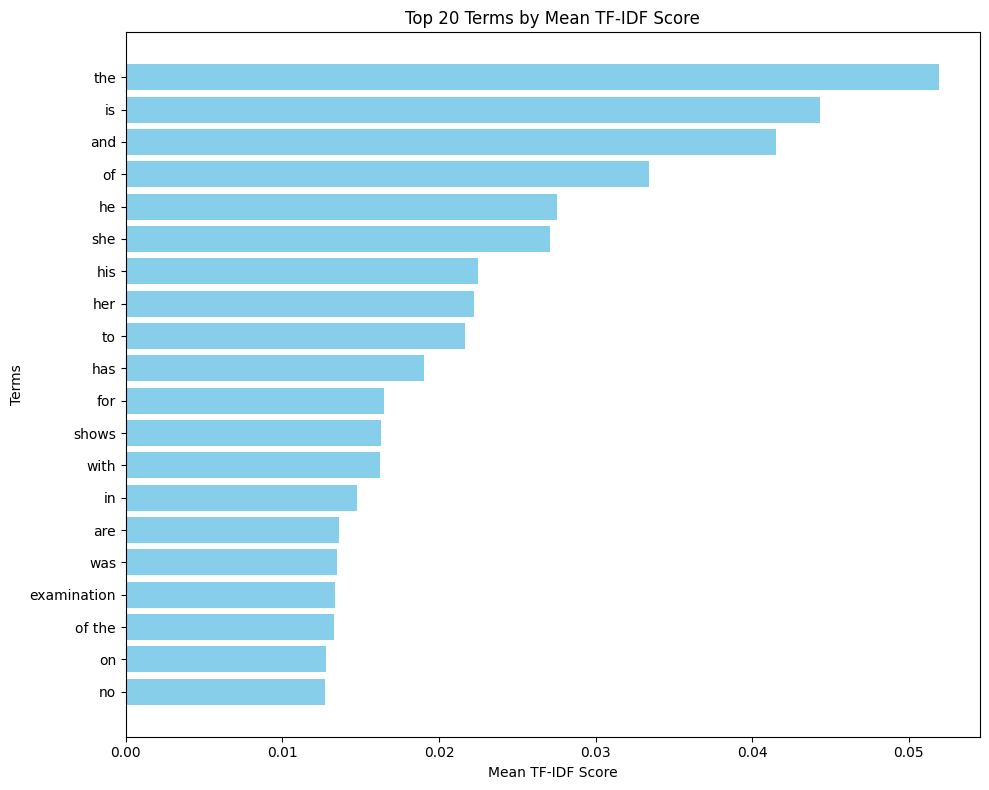

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Seleccionando solo los textos con errores
texts_with_errors = df[df['Error Flag'] == 1]['Text']

#
# Ajustando el vectorizador a los textos y transformándolos en una matriz TF-IDF
tfidf_matrix = vectorizer.fit_transform(texts_with_errors)

# Obteniendo los nombres de las características (términos) para su posterior análisis
feature_names = vectorizer.get_feature_names_out()

# Calculando las puntuaciones TF-IDF promedio para cada término
tfidf_means = np.mean(tfidf_matrix, axis=0)
tfidf_means = np.array(tfidf_means).flatten()

# Creando un DataFrame para los términos y sus puntuaciones TF-IDF promedio
terms_tfidf = pd.DataFrame({'Term': feature_names, 'TF-IDF': tfidf_means})

# Ordenando los términos por sus puntuaciones TF-IDF promedio, de mayor a menor
terms_tfidf_sorted = terms_tfidf.sort_values(by='TF-IDF', ascending=False).head(20)

# Graficando los 20 términos más relevantes basados en sus puntuaciones TF-IDF promedio
plt.figure(figsize=(10, 8))
plt.barh(terms_tfidf_sorted['Term'][::-1], terms_tfidf_sorted['TF-IDF'][::-1], color='skyblue')
plt.xlabel('Mean TF-IDF Score')
plt.ylabel('Terms')
plt.title('Top 20 Terms by Mean TF-IDF Score')
plt.tight_layout()
plt.show()


**Bigramas (Dos Palabras Consecutivas)**

- La gráfica de bigramas revela combinaciones de dos palabras que aparecen juntas frecuentemente en textos con errores. Estos bigramas pueden representar frases técnicas específicas, entidades nombradas, o patrones lingüísticos que son comunes en textos con imprecisiones o errores específicos.
Los bigramas con mayores puntuaciones TF-IDF son aquellos que, si bien pueden aparecer en un número limitado de documentos, su presencia es muy significativa dentro de esos textos.

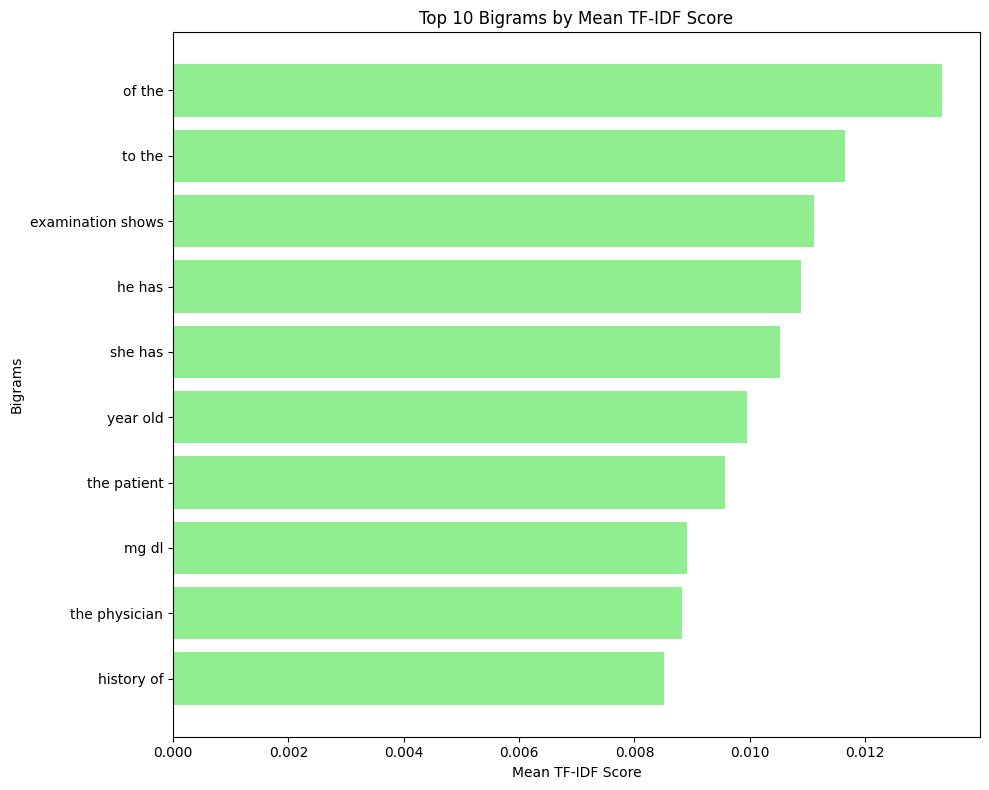

In [ ]:
# bigramas
bigrams = [term for term in feature_names if len(term.split()) == 2]

# Filtrando las puntuaciones TF-IDF para bigramas y trigramas
bigrams_tfidf = terms_tfidf[terms_tfidf['Term'].isin(bigrams)].sort_values(by='TF-IDF', ascending=False).head(10)

# Gráficas para Bigramas
plt.figure(figsize=(10, 8))
plt.barh(bigrams_tfidf['Term'][::-1], bigrams_tfidf['TF-IDF'][::-1], color='lightgreen')
plt.xlabel('Mean TF-IDF Score')
plt.ylabel('Bigrams')
plt.title('Top 10 Bigrams by Mean TF-IDF Score')
plt.tight_layout()
plt.show()



**Trigramas (Tres Palabras Consecutivas)**

- Similarmente, la gráfica de trigramas muestra las secuencias de tres palabras que son destacadas en el contexto de los errores. Estos trigramas pueden proporcionar aún más contexto que los bigramas, capturando frases o términos técnicos complejos que son cruciales para entender los errores específicos en el texto.
Al igual que con los bigramas, los trigramas de alta puntuación TF-IDF son especialmente relevantes para los documentos en los que aparecen, lo que indica su importancia para identificar o caracterizar los errores.

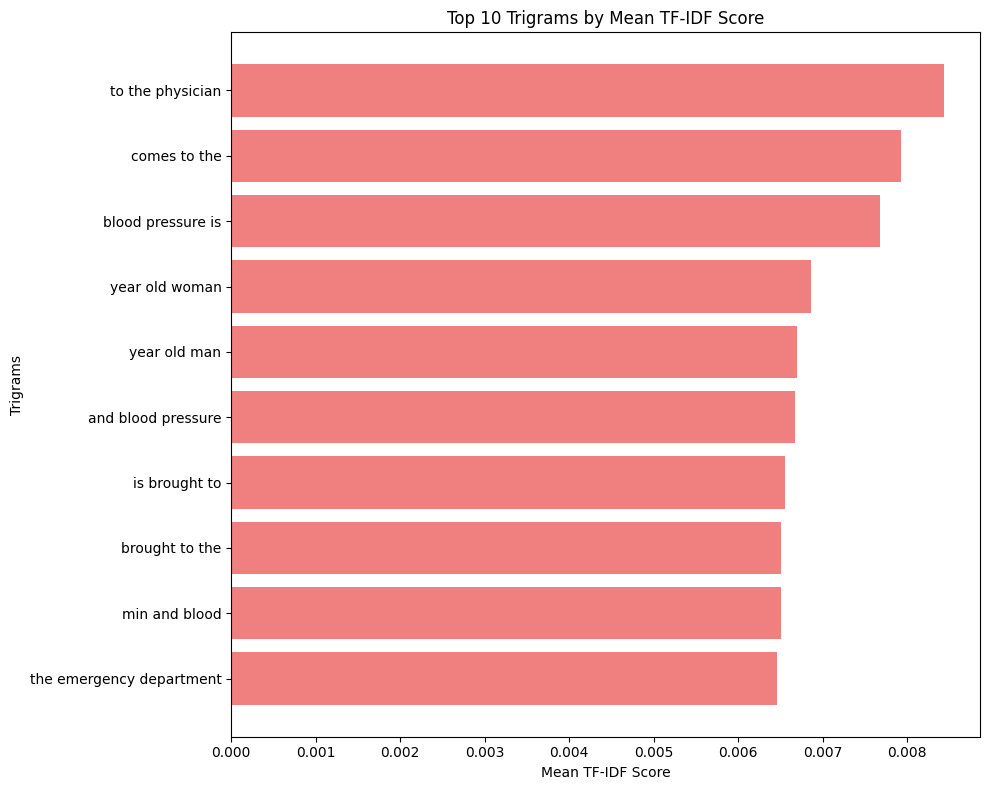

In [ ]:
trigrams = [term for term in feature_names if len(term.split()) == 3]

# Filtrando las puntuaciones TF-IDF
trigrams_tfidf = terms_tfidf[terms_tfidf['Term'].isin(trigrams)].sort_values(by='TF-IDF', ascending=False).head(10)

# Gráficas para Trigramas
plt.figure(figsize=(10, 8))
plt.barh(trigrams_tfidf['Term'][::-1], trigrams_tfidf['TF-IDF'][::-1], color='lightcoral')
plt.xlabel('Mean TF-IDF Score')
plt.ylabel('Trigrams')
plt.title('Top 10 Trigrams by Mean TF-IDF Score')
plt.tight_layout()
plt.show()


In [ ]:
pip install torch

In [ ]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 7.4 MB/s eta 0:00:00


In [ ]:
pip install --upgrade transformers

In [ ]:
pip install accelerate -U

In [ ]:
pip install accelerate

In [ ]:
pip install git+https://github.com/huggingface/accelerate

  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-xazgxtqz
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-xazgxtqz
  Resolved https://github.com/huggingface/accelerate to commit 16eb6d76bf987c7d8d877ce5152f2e29878eab37
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for accelerate: filename=accelerate-0.28.0.dev0-py3-none-any.whl size=289777 sha256=4fd32cc7d66b5143fc5e0f5b524a82cf7c4d6b55b7e04772c38a40e9e6064bd0
  Stored in directory: /tmp/pip-ephem-wheel-cache-kfp21jt5/wheels/f6/c7/9d/1b8a5ca8353d9307733bc719107acb67acdc95063bba749f26
Successfully built accelerate
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.27.2
    Uninstalling accelerate-0.27.2:
      Successfully uninstalled accelerate-0.27.2


In [ ]:
pip install scikit-learn

In [ ]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
pip install sentence-transformers

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
from transformers import AutoTokenizer, AutoModel
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, TrainingArguments, Trainer
from transformers import TextDataset, DataCollatorWithPadding
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
from tqdm.auto import tqdm
import torch

In [ ]:
pip install tqdm


In [ ]:
pip install imbalanced-learn


In [ ]:
from transformers import LongformerTokenizer, LongformerForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import numpy as np
import pandas as pd

# Asumiendo que `df` es tu DataFrame
texts = df['Text'].tolist()
labels = df['Error Flag'].tolist()

# Dividir los datos
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.3, random_state=1234)


# Convertir listas a DataFrame
df_train = pd.DataFrame({'text': train_texts, 'label': train_labels})

# Separar por clase
df_majority = df_train[df_train.label == 0]
df_minority = df_train[df_train.label == 1]

# Sobremuestrear la clase minoritaria
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Muestra con reemplazo
                                 n_samples=len(df_majority),    # Para igualar número de muestras
                                 random_state=1234) # Reproducible

# Combinar la clase mayoritaria con la clase minoritaria sobremuestreada
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Actualizar train_texts y train_labels con datos balanceados
train_texts_balanced = df_upsampled.text.tolist()
train_labels_balanced = df_upsampled.label.tolist()

# Proceder a tokenizar los datos de entrenamiento y validación ya balanceados
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

train_encodings_balanced = tokenizer(train_texts_balanced, truncation=True, padding=True, max_length=4096, return_tensors='pt')
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=4096, return_tensors='pt')

# Crear datasets
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset_balanced = TextDataset(train_encodings_balanced, train_labels_balanced)
val_dataset = TextDataset(val_encodings, val_labels)

# Continuar con la definición del modelo, argumentos de entrenamiento, y entrenador como antes
model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=2)

# Define compute_metrics function if not already defined
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    learning_rate=1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=87.5,
    weight_decay=0.01,
    evaluation_strategy='steps',
    eval_steps=100,
    logging_dir='./logs',
    save_strategy='steps',
    save_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    lr_scheduler_type="cosine_with_restarts",
    fp16=True,
    logging_steps=100,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_balanced,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

# Evaluar en el conjunto de entrenamiento y prueba (validación)
train_result = trainer.evaluate(train_dataset_balanced)
print("Resultados en el conjunto de entrenamiento:", train_result)

val_result = trainer.evaluate(val_dataset)
print("Resultados en el conjunto de prueba:", val_result)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches'

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
100,0.700600,0.689643,0.584475,0.736741,0.584992,0.994792
200,0.698300,0.702365,0.417047,0.010336,0.666667,0.005208
300,0.696200,0.681216,0.584475,0.737752,0.584475,1.000000
400,0.692800,0.703558,0.414003,0.301270,0.497006,0.216146
500,0.691600,0.688561,0.578387,0.732883,0.581930,0.989583
600,0.680900,0.709644,0.528158,0.682377,0.562500,0.867188
700,0.680700,0.815114,0.401826,0.224852,0.463415,0.148438
800,0.616500,0.946597,0.418569,0.399371,0.503968,0.330729
900,0.616600,0.904390,0.410959,0.494118,0.496063,0.492188
1000,0.536300,1.145599,0.365297,0.387665,0.444444,0.343750


Input ids are automatically padded from 459 to 512 to be a multiple of `config.attention_window`: 512


Resultados en el conjunto de entrenamiento: {'eval_loss': 0.6996867060661316, 'eval_accuracy': 0.5, 'eval_f1': 0.6666666666666666, 'eval_precision': 0.5, 'eval_recall': 1.0, 'eval_runtime': 49.7669, 'eval_samples_per_second': 28.011, 'eval_steps_per_second': 3.516, 'epoch': 10.0}
Resultados en el conjunto de prueba: {'eval_loss': 0.6812162399291992, 'eval_accuracy': 0.5844748858447488, 'eval_f1': 0.7377521613832853, 'eval_precision': 0.5844748858447488, 'eval_recall': 1.0, 'eval_runtime': 23.44, 'eval_samples_per_second': 28.029, 'eval_steps_per_second': 3.541, 'epoch': 10.0}


Mejor configuracion actual

In [ ]:
# Verificar la distribución de clases después del sobremuestreo
print("Distribución de clases después del sobremuestreo:", Counter(train_labels_balanced))

Distribución de clases después del sobremuestreo: Counter({0: 697, 1: 697})


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definir las rutas de guardado para el modelo y el tokenizador
model_path = '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/Long/long_model'
tokenizer_path = '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/Long/long_tokenizer'

# Guardar el modelo entrenado
model.save_pretrained(model_path)

# Guardar el tokenizador
tokenizer.save_pretrained(tokenizer_path)


('/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/Long/long_tokenizer/tokenizer_config.json',
 '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/Long/long_tokenizer/special_tokens_map.json',
 '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/Long/long_tokenizer/vocab.json',
 '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/Long/long_tokenizer/merges.txt',
 '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/Long/long_tokenizer/added_tokens.json')